**Project Description**

Using a dataset comprised of songs of two music genres (Hip-Hop and Rock), you will train a classifier to distinguish between the two genres based only on track information derived from Echonest (now part of Spotify). You will first make use of pandas and seaborn packages in Python for subsetting the data, aggregating information, and creating plots when exploring the data for obvious trends or factors you should be aware of when doing machine learning. Next, you will use the scikit-learn package to predict whether you can correctly classify a song's genre based on features such as danceability, energy, acousticness, tempo, etc. You will go over implementations of common algorithms such as PCA, logistic regression, decision trees, and so forth.

## 1. Preparing our dataset
<p><em>These recommendations are so on point! How does this playlist know me so well?</em></p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_449/img/iphone_music.jpg" alt="Project Image Record" width="600px"></p>
<p>Over the past few years, streaming services with huge catalogs have become the primary means through which most people listen to their favorite music. But at the same time, the sheer amount of music on offer can mean users might be a bit overwhelmed when trying to look for newer music that suits their tastes.</p>
<p>For this reason, streaming services have looked into means of categorizing music to allow for personalized recommendations. One method involves direct analysis of the raw audio information in a given song, scoring the raw data on a variety of metrics. Today, we'll be examining data compiled by a research group known as The Echo Nest. Our goal is to look through this dataset and classify songs as being either 'Hip-Hop' or 'Rock' - all without listening to a single one ourselves. In doing so, we will learn how to clean our data, do some exploratory data visualization, and use feature reduction towards the goal of feeding our data through some simple machine learning algorithms, such as decision trees and logistic regression.</p>
<p>To begin with, let's load the metadata about our tracks alongside the track metrics compiled by The Echo Nest. A song is about more than its title, artist, and number of listens. We have another dataset that has musical features of each track such as <code>danceability</code> and <code>acousticness</code> on a scale from -1 to 1. These exist in two different files, which are in different formats - CSV and JSON. While CSV is a popular file format for denoting tabular data, JSON is another common file format in which databases often return the results of a given query.</p>
<p>Let's start by creating two pandas <code>DataFrames</code> out of these files that we can merge so we have features and labels (often also referred to as <code>X</code> and <code>y</code>) for the classification later on.</p>

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.3f}'.format

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 600)

# Read in track metadata with genre labels
track_data = pd.read_csv(r"C:\Users\Shahbaz\Desktop\staff\Classify-Song-Genres-from-Audio-Data\datasets\fma-rock-vs-hiphop.csv")

# Read in track metrics with the features
track_metrics = pd.read_json(r"C:\Users\Shahbaz\Desktop\staff\Classify-Song-Genres-from-Audio-Data\datasets\echonest-metrics.json")

df_track_data = track_data.copy()
df_track_metrics = track_metrics.copy()

In [53]:
track_data.head()

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,genres_all,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]","[58, 12, 45]",NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]","[58, 12, 45]",NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],"[25, 12]",NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],"[25, 12]",NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],"[26, 12]",NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood


In [54]:
track_metrics.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.417,0.676,0.634,0.011,0.178,0.159,165.922,0.577
1,3,0.374,0.529,0.817,0.002,0.106,0.462,126.957,0.269
2,5,0.044,0.746,0.701,0.001,0.373,0.125,100.260,0.622
3,10,0.952,0.658,0.925,0.965,0.115,0.033,111.562,0.964
4,134,0.452,0.513,0.560,0.019,0.097,0.526,114.290,0.894


In [55]:
print(track_data.shape)
print(track_metrics.shape)

(17734, 21)
(13129, 9)


In [56]:
# Merge the track_id and genre_top columns of tracks and echonest_metrics on track_id values
data = track_metrics.merge(track_data[['genre_top','track_id']], on='track_id', how='inner')

In [57]:
data.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
0,2,0.417,0.676,0.634,0.011,0.178,0.159,165.922,0.577,Hip-Hop
1,3,0.374,0.529,0.817,0.002,0.106,0.462,126.957,0.269,Hip-Hop
2,5,0.044,0.746,0.701,0.001,0.373,0.125,100.260,0.622,Hip-Hop
3,134,0.452,0.513,0.560,0.019,0.097,0.526,114.290,0.894,Hip-Hop
4,153,0.988,0.256,0.980,0.973,0.121,0.052,90.241,0.034,Rock


In [58]:
data.describe()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
count,4802.000,4802.000,4802.000,4802.000,4802.000,4802.000,4802.000,4802.000,4802.000
mean,30164.872,0.487,0.437,0.625,0.604,0.188,0.105,126.688,0.453
std,28592.014,0.368,0.184,0.244,0.376,0.151,0.146,34.002,0.267
min,2.000,0.000,0.051,0.000,0.000,0.025,0.023,29.093,0.014
25%,7494.250,0.084,0.296,0.451,0.165,0.104,0.037,98.001,0.225
50%,20723.500,0.516,0.419,0.648,0.809,0.123,0.050,124.625,0.446
75%,44240.750,0.856,0.565,0.837,0.915,0.215,0.088,151.450,0.667
max,124722.000,0.996,0.962,1.000,0.993,0.971,0.966,250.059,0.984


In [59]:
# Inspect the resultant dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4802 entries, 0 to 4801
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4802 non-null   int64  
 1   acousticness      4802 non-null   float64
 2   danceability      4802 non-null   float64
 3   energy            4802 non-null   float64
 4   instrumentalness  4802 non-null   float64
 5   liveness          4802 non-null   float64
 6   speechiness       4802 non-null   float64
 7   tempo             4802 non-null   float64
 8   valence           4802 non-null   float64
 9   genre_top         4802 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 375.3+ KB


c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


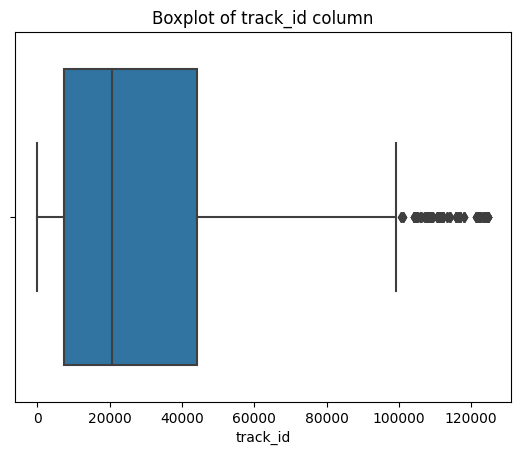

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


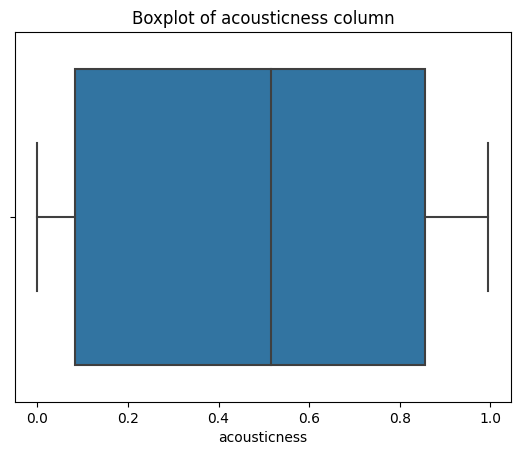

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


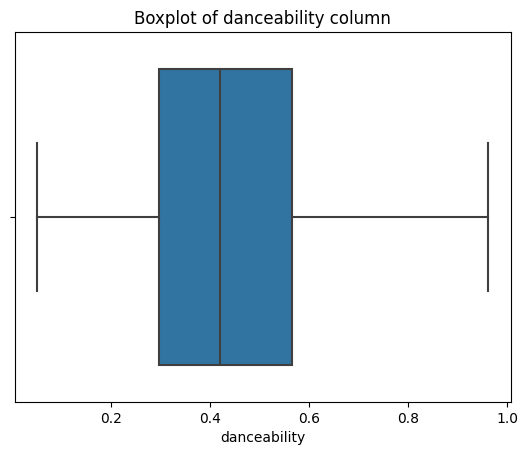

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


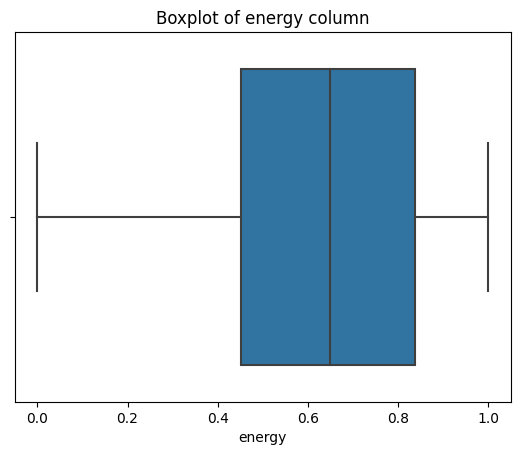

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


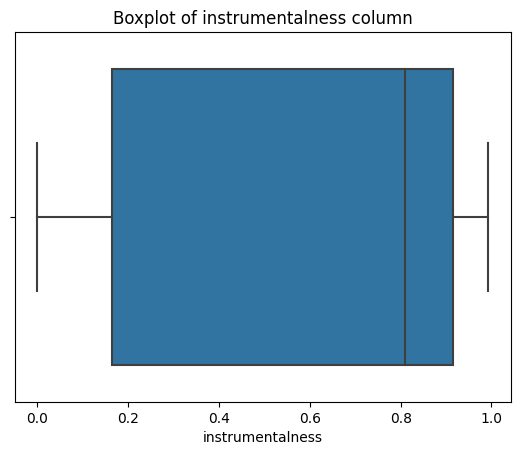

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


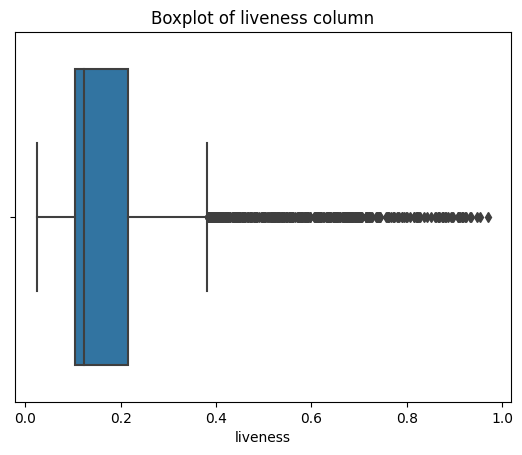

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


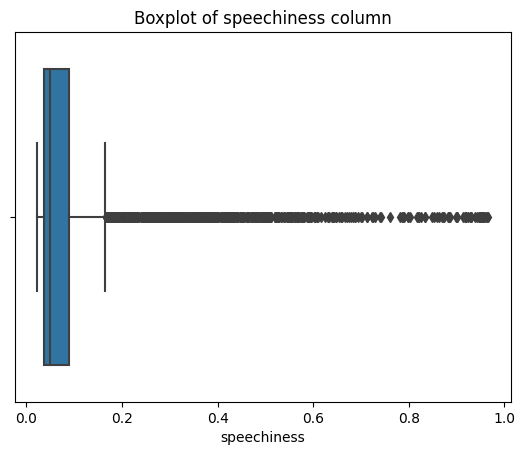

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


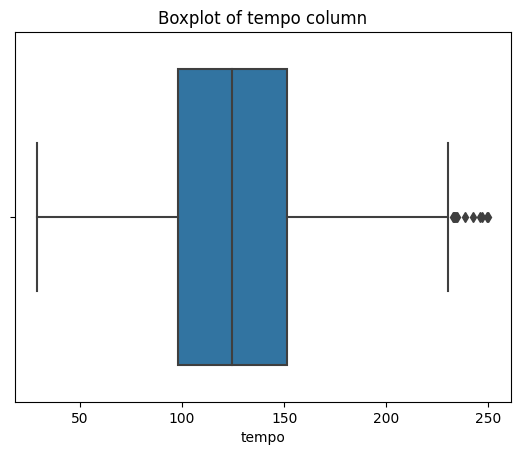

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


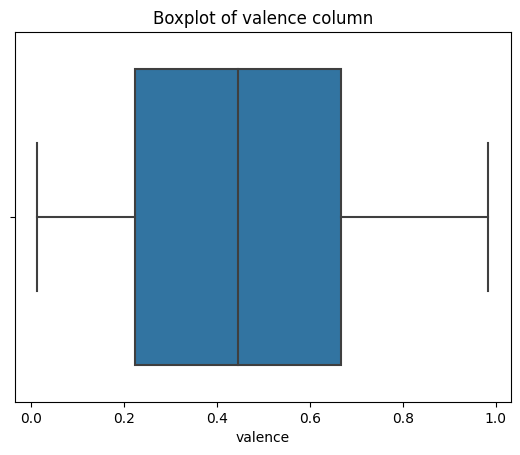

In [60]:
# Outlier treatment
for x in data.columns:
    if data[x].dtype != object:
        sns.boxplot(data=data, x=data[x])
        plt.title(f"Boxplot of {x} column")
        plt.show()

In [61]:
len(data[data['liveness']>0.4])

390

In [62]:
len(data[data['speechiness']>0.18])

657

In [63]:
numeric_data = data.select_dtypes(exclude='object')

q1 = numeric_data.quantile(0.25)
q3 = numeric_data.quantile(0.75)
IQR = q3 - q1

lower = np.maximum(0, q1 - 1.5*IQR)
upper = q3 + 1.5*IQR

In [64]:
lower

track_id            0.000
acousticness        0.000
danceability        0.000
energy              0.000
instrumentalness    0.000
liveness            0.000
speechiness         0.000
tempo              17.827
valence             0.000
dtype: float64

In [65]:
upper

track_id           99360.500
acousticness           2.014
danceability           0.969
energy                 1.416
instrumentalness       2.041
liveness               0.382
speechiness            0.165
tempo                231.624
valence                1.330
dtype: float64

In [66]:
for x in data.columns:
    if (x != 'track_id') and (data[x].dtype != object):
        data[x] = np.where(data[x] < lower[x], lower[x], data[x])
        data[x] = np.where(data[x] > upper[x], upper[x], data[x])


c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


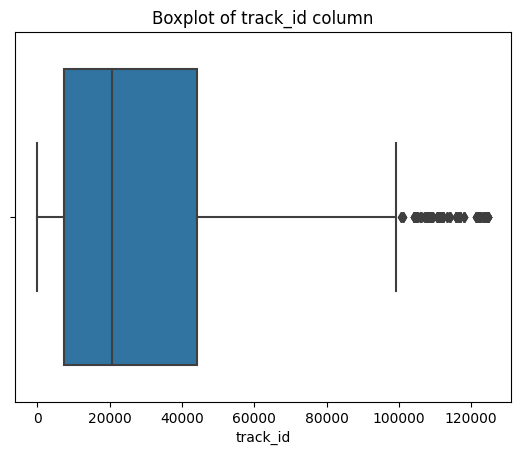

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


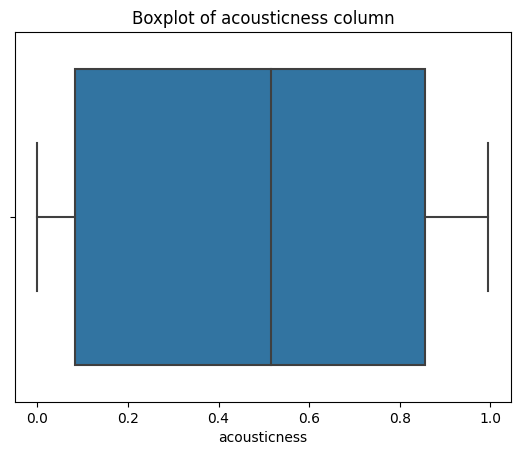

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


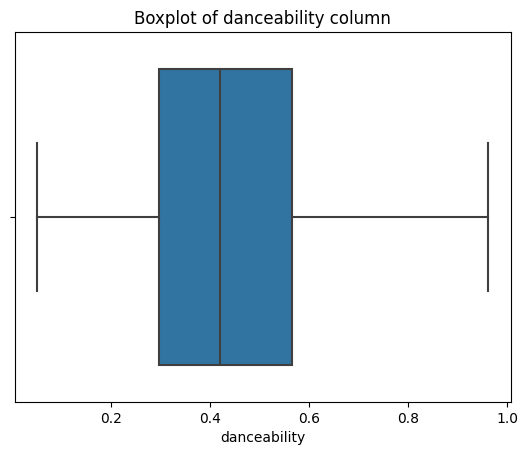

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


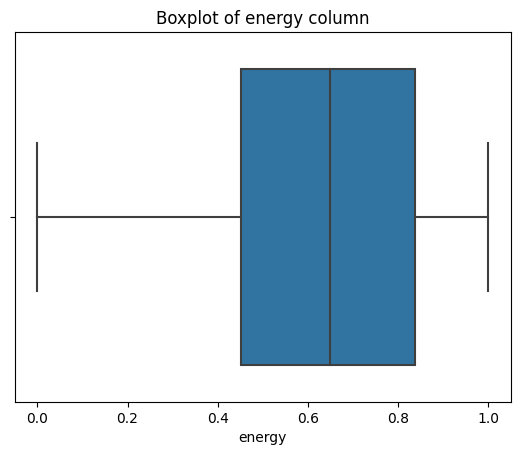

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


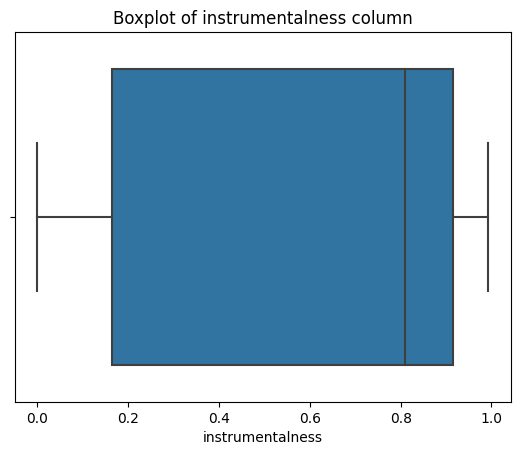

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


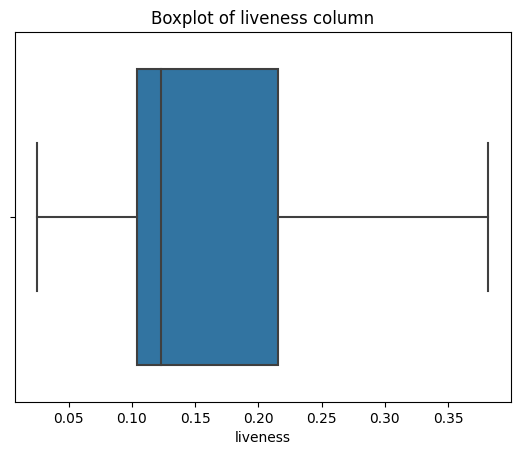

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


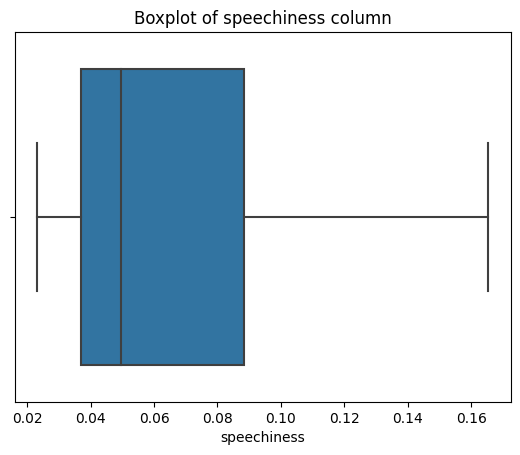

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


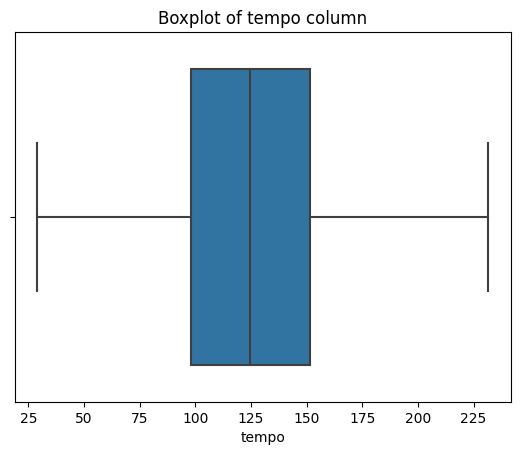

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


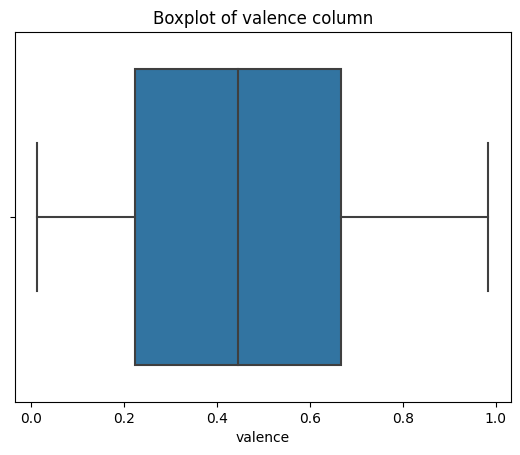

In [67]:
for x in data.columns:
    if data[x].dtype != object:
        sns.boxplot(data=data, x=data[x])
        plt.title(f"Boxplot of {x} column")
        plt.show()

## 2. Pairwise relationships between continuous variables
<p>We typically want to avoid using variables that have strong correlations with each other -- hence avoiding feature redundancy -- for a few reasons:</p>
<ul>
<li>To keep the model simple and improve interpretability (with many features, we run the risk of overfitting).</li>
<li>When our datasets are very large, using fewer features can drastically speed up our computation time.</li>
</ul>
<p>To get a sense of whether there are any strongly correlated features in our data, we will use built-in functions in the <code>pandas</code> package.</p>

In [68]:
# Checking the distributions
from scipy import stats

normal_distributed = []
not_normal_distributed = []

for i in data.columns:
    if data[i].dtype != object:
        ks_stat, ks_p_value = stats.kstest(data[i], cdf='norm')
        print(f'Column: {i}')
        print(f'Kolmogorov-Smirnov Test:')
        print(f'Test Statistic: {ks_stat}')
        print(f'p-value: {ks_p_value}')
        print('\n')
        if ks_p_value > 0.05:
            normal_distributed.append(i)
        else:
            not_normal_distributed.append(i)

Column: track_id
Kolmogorov-Smirnov Test:
Test Statistic: 0.9995832202205647
p-value: 0.0


Column: acousticness
Kolmogorov-Smirnov Test:
Test Statistic: 0.5000003786361183
p-value: 0.0


Column: danceability
Kolmogorov-Smirnov Test:
Test Statistic: 0.52831391506728
p-value: 0.0


Column: energy
Kolmogorov-Smirnov Test:
Test Statistic: 0.5222127020110752
p-value: 0.0


Column: instrumentalness
Kolmogorov-Smirnov Test:
Test Statistic: 0.5
p-value: 0.0


Column: liveness
Kolmogorov-Smirnov Test:
Test Statistic: 0.513159918350863
p-value: 0.0


Column: speechiness
Kolmogorov-Smirnov Test:
Test Statistic: 0.5092680832731188
p-value: 0.0


Column: tempo
Kolmogorov-Smirnov Test:
Test Statistic: 1.0
p-value: 0.0


Column: valence
Kolmogorov-Smirnov Test:
Test Statistic: 0.509018083821163
p-value: 0.0




In [69]:
normal_distributed

[]

In [70]:
not_normal_distributed

['track_id',
 'acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'liveness',
 'speechiness',
 'tempo',
 'valence']

In [71]:
data['genre_top'].value_counts()

genre_top
Rock       3892
Hip-Hop     910
Name: count, dtype: int64

In [72]:
data['genre_top'] = data['genre_top'].map({'Rock':0, 'Hip-Hop':1})

In [73]:
import pandas as pd

def target_correlation(data, target, threshold=0.01):
    corr_matrix = data.corr(method='spearman')
    
    result_explaining_target = []
    result_not_explaining_target = []
    
    for variable in corr_matrix.index:
        if variable != target:
            correlation = corr_matrix.loc[variable, target]
            if abs(correlation) > threshold:
                result_explaining_target.append({'Variable': variable, 'Correlation with Target': correlation})
            else:
                result_not_explaining_target.append({'Variable': variable, 'Correlation with Target': correlation})
    
    return pd.DataFrame(result_explaining_target), pd.DataFrame(result_not_explaining_target)


In [74]:
explaining_target, not_explaining_target = target_correlation(data, 'genre_top')
explaining_target

,Variable,Correlation with Target
0,track_id,0.051
1,acousticness,-0.094
2,danceability,0.455
3,energy,-0.149
4,instrumentalness,-0.301
5,speechiness,0.481
6,tempo,-0.139
7,valence,0.250


In [75]:
not_explaining_target

,Variable,Correlation with Target
0,liveness,-0.007


We have to drop one column when threshold is 0.01. (Threshold is low, don't pay attention)

In [76]:

def intercorrelation(data, target, threshold=0.5):
    corr_matrix = data.drop(columns=[target]).corr(method='spearman')
    
    highly_correlated_variables = (np.abs(corr_matrix) > threshold) & (corr_matrix != 1.0)
    
    independent_variable_pairs = np.where(highly_correlated_variables)
    
    correlated_pairs_set = set()

    for var1, var2 in zip(independent_variable_pairs[0], independent_variable_pairs[1]):

        if var1 < var2:
            correlated_pairs_set.add((corr_matrix.index[var1], corr_matrix.columns[var2]))
        else:
            correlated_pairs_set.add((corr_matrix.index[var2], corr_matrix.columns[var1]))
    
    result_intercorrelated_independent = pd.DataFrame(list(correlated_pairs_set), columns=['Variable 1', 'Variable 2'])
    
    return result_intercorrelated_independent

In [77]:
intercorrelated_result = intercorrelation(data, 'genre_top')
intercorrelated_result

,Variable 1,Variable 2


There is no any correlated column in our data when threshold is 0.5.

In [78]:
# Create a correlation matrix
corr_matrix = data.corr(numeric_only=True, method='spearman')
corr_matrix.style.background_gradient()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
track_id,1.000000,-0.344517,0.069876,0.107845,-0.221159,0.046183,-0.046997,-0.042754,0.031052,0.050817
acousticness,-0.344517,1.000000,-0.001819,-0.283787,0.244809,0.012443,-0.025228,-0.028000,-0.014801,-0.094458
danceability,0.069876,-0.001819,1.000000,-0.270812,-0.252713,-0.132169,0.106906,-0.234742,0.476212,0.455014
energy,0.107845,-0.283787,-0.270812,1.000000,0.010948,0.113581,0.142800,0.199985,-0.000906,-0.149356
instrumentalness,-0.221159,0.244809,-0.252713,0.010948,1.000000,-0.085601,-0.269424,0.021682,-0.235501,-0.300787
liveness,0.046183,0.012443,-0.132169,0.113581,-0.085601,1.000000,0.082803,-0.004956,-0.047802,-0.007037
speechiness,-0.046997,-0.025228,0.106906,0.142800,-0.269424,0.082803,1.000000,0.045462,-0.011097,0.480884
tempo,-0.042754,-0.028000,-0.234742,0.199985,0.021682,-0.004956,0.045462,1.000000,0.044987,-0.139391
valence,0.031052,-0.014801,0.476212,-0.000906,-0.235501,-0.047802,-0.011097,0.044987,1.000000,0.250231
genre_top,0.050817,-0.094458,0.455014,-0.149356,-0.300787,-0.007037,0.480884,-0.139391,0.250231,1.000000


Here we can see an interesting correlation between <code>danceability</code> and <code>valence</code>, but it's not strong enough.
<hr>
<b>
So we don't need to drop any columns for intercorrelation.

In [79]:
# Extract the list of variables from not_explaining_target
not_explaining_target_variables = not_explaining_target['Variable'].tolist()
not_explaining_target_variables.append('track_id')
data = data.drop(columns=not_explaining_target_variables)

In [80]:
data.head()

,acousticness,danceability,energy,instrumentalness,speechiness,tempo,valence,genre_top
0,0.417,0.676,0.634,0.011,0.159,165.922,0.577,1
1,0.374,0.529,0.817,0.002,0.165,126.957,0.269,1
2,0.044,0.746,0.701,0.001,0.125,100.260,0.622,1
3,0.452,0.513,0.560,0.019,0.165,114.290,0.894,1
4,0.988,0.256,0.980,0.973,0.052,90.241,0.034,0


In [81]:
data.shape

(4802, 8)

In [82]:
data.columns.tolist()

['acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'speechiness',
 'tempo',
 'valence',
 'genre_top']

In [83]:
# variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_variance(data, columns):
    vif_data = data[columns]
    vif_values = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]
    vif_result = pd.DataFrame({
        'VIF':vif_values,
        'Columns':columns
    })
    return vif_result

calculate_variance(data, [
    'acousticness',
    'danceability',
    'energy',
    'instrumentalness',
    'speechiness',
    # 'tempo',      # 11.013
    'valence',
    'genre_top'
])

,VIF,Columns
0,2.919,acousticness
1,8.222,danceability
2,5.857,energy
3,3.807,instrumentalness
4,5.159,speechiness
5,5.360,valence
6,2.289,genre_top


We have to drop one more column which is <code>tempo</code> column because of we get this result after Variance Inflation Factor

In [84]:
data = data.drop('tempo', axis=1)

## 3. Normalizing the feature data
<p>As mentioned earlier, it can be particularly useful to simplify our models and use as few features as necessary to achieve the best result. Since we didn't find any particular strong correlations between our features, we can instead use a common approach to reduce the number of features called <strong>principal component analysis (PCA)</strong>. </p>
<p>It is possible that the variance between genres can be explained by just a few features in the dataset. PCA rotates the data along the axis of highest variance, thus allowing us to determine the relative contribution of each feature of our data towards the variance between classes. </p>
<p>However, since PCA uses the absolute variance of a feature to rotate the data, a feature with a broader range of values will overpower and bias the algorithm relative to the other features. To avoid this, we must first normalize our data. There are a few methods to do this, but a common way is through <em>standardization</em>, such that all features have a mean = 0 and standard deviation = 1 (the resultant is a z-score).</p>

In [85]:
# Define our features
features = data.drop(['genre_top'], axis=1)

# Define our labels
labels = data['genre_top']

# Import the StandardScaler
from sklearn.preprocessing import StandardScaler

# Scale the features and set the values to a new variable
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [86]:
features.head()

,acousticness,danceability,energy,instrumentalness,speechiness,valence
0,0.417,0.676,0.634,0.011,0.159,0.577
1,0.374,0.529,0.817,0.002,0.165,0.269
2,0.044,0.746,0.701,0.001,0.125,0.622
3,0.452,0.513,0.560,0.019,0.165,0.894
4,0.988,0.256,0.980,0.973,0.052,0.034


In [87]:
scaled_features.shape

(4802, 6)

## 4. Principal Component Analysis on our scaled data
<p>Now that we have preprocessed our data, we are ready to use PCA to determine by how much we can reduce the dimensionality of our data. We can use <strong>scree-plots</strong> and <strong>cumulative explained ratio plots</strong> to find the number of components to use in further analyses.</p>
<p>Scree-plots display the number of components against the variance explained by each component, sorted in descending order of variance. Scree-plots help us get a better sense of which components explain a sufficient amount of variance in our data. When using scree plots, an 'elbow' (a steep drop from one data point to the next) in the plot is typically used to decide on an appropriate cutoff.</p>

In [88]:
# This is just to make plots appear in the notebook
%matplotlib inline

# Import our plotting module, and PCA class
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Get our explained variance ratios from PCA using all features
pca = PCA()
pca.fit(scaled_features)
exp_variance_ratio = pca.explained_variance_ratio_
exp_variance_ratio

array([0.31331385, 0.22440777, 0.16671065, 0.13230009, 0.10153488,
       0.06173277])

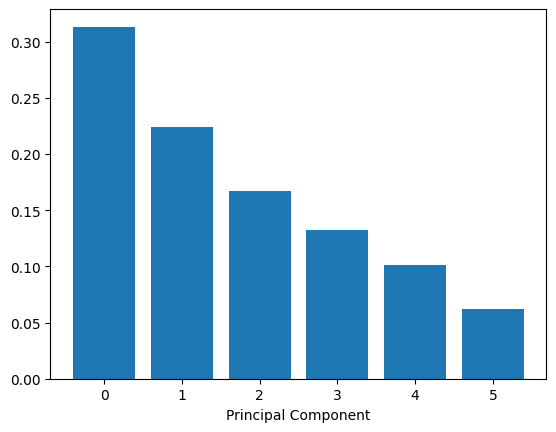

In [89]:
# plot the explained variance using a barplot
fig, ax = plt.subplots()
ax.bar(range(pca.n_components_), exp_variance_ratio)
ax.set_xlabel('Principal Component')
plt.show()

## 5. Further visualization of PCA
<p>Unfortunately, there does not appear to be a clear elbow in this scree plot, which means it is not straightforward to find the number of intrinsic dimensions using this method. </p>
<p>But all is not lost! Instead, we can also look at the <strong>cumulative explained variance plot</strong> to determine how many features are required to explain, say, about 90% of the variance (cutoffs are somewhat arbitrary here, and usually decided upon by 'rules of thumb'). Once we determine the appropriate number of components, we can perform PCA with that many components, ideally reducing the dimensionality of our data.</p>

In [90]:
# using numpy
# Calculate the cumulative explained variance
cum_exp_variance = np.cumsum(exp_variance_ratio)
cum_exp_variance

array([0.31331385, 0.53772162, 0.70443227, 0.83673235, 0.93826723,
       1.        ])

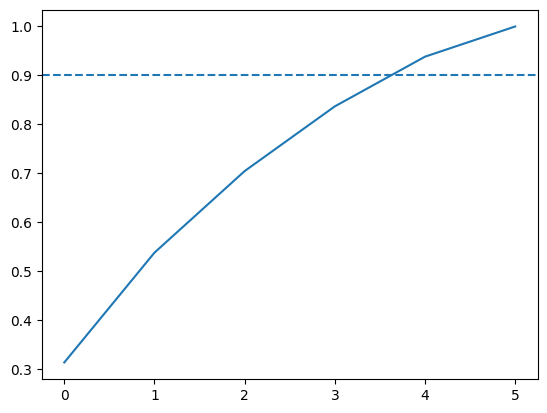

In [91]:
# Plot the cumulative explained variance and draw a dashed line at 0.90.
fig, ax = plt.subplots()
ax.plot(range(data.shape[1]-1),cum_exp_variance)
ax.axhline(y=0.9, linestyle='--')
plt.show()

In [92]:
# Find the number of components to retain at least 95% of the variance
n_components = np.argmax(np.cumsum(exp_variance_ratio) >= 0.9 * np.sum(exp_variance_ratio)) + 1

print("Number of components to retain 90% of variance:", n_components)

Number of components to retain 90% of variance: 5


In [93]:
# Perform PCA with the chosen number of components and project data onto components
pca = PCA(n_components, random_state=42)
pca.fit(scaled_features)
pca_projection = pca.transform(scaled_features)

In [94]:
pca_projection.shape

(4802, 5)

## 7. Logistic Regression
<p>Sometimes simplest is best, and so we will start by applying <strong>logistic regression</strong>. Logistic regression makes use of what's called the logistic function to calculate the odds that a given data point belongs to a given class. Once we have both models, we can compare them on a few performance metrics, such as false positive and false negative rate (or how many points are inaccurately classified). </p>

In [95]:
# import train_test_split for Logistic Regression model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pca_projection, labels, random_state=42, test_size=0.2)

In [96]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Train our logistic regression and predict labels for the test set
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_test_predictions = log_model.predict(X_test)

In [97]:
# Create the classification report for Logistic Regression
from sklearn.metrics import classification_report

class_report = classification_report(y_test, y_test_predictions)
print(f"Classification report of Logistic Model with PCA_projection: \n {class_report}")

Classification report of Logistic Model with PCA_projection: 
               precision    recall  f1-score   support

           0       0.93      0.96      0.95       779
           1       0.81      0.70      0.75       182

    accuracy                           0.91       961
   macro avg       0.87      0.83      0.85       961
weighted avg       0.91      0.91      0.91       961



In [98]:
labels.value_counts()

genre_top
0    3892
1     910
Name: count, dtype: int64

Our data is imbalanced, so here accuracy is not really a good metric. Moreover let's look at the confusion matrix.

In [99]:
# import confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_test_predictions)
conf_matrix

array([[750,  29],
       [ 55, 127]], dtype=int64)

In [100]:
750/(750+55)

0.9316770186335404

In [101]:
127/(127+29)

0.8141025641025641

## 8. Balance our data for greater performance
<p>Our model do well, boasting an average precision of 87%. However, looking at our classification report, we can see that Rock (0) songs are fairly well classified, but hip-hop songs are disproportionately misclassified as rock songs. </p>
<p>Why might this be the case? Well, just by looking at the number of data points we have for each class, we see that we have far more data points for the rock classification than for hip-hop, potentially skewing our model's ability to distinguish between classes. This also tells us that most of our model's accuracy is driven by its ability to classify just rock songs, which is less than ideal.</p>
<p>To account for this, we can weight the value of a correct classification in each class inversely to the occurrence of data points for each class. Since a correct classification for "Rock" is not more important than a correct classification for "Hip-Hop" (and vice versa), we only need to account for differences in <em>sample size</em> of our data points when weighting our classes here, and not relative importance of each class. </p>

In [102]:
from sklearn.model_selection import KFold, cross_val_score

# Set up our K-fold cross-validation
kf = KFold(n_splits=10)

# Train our models using KFold cv
log_reg_cv_score = cross_val_score(log_model, pca_projection, labels, cv=kf)

# Print the mean of each array of scores
print(f'Cross validation score of Logistic Regression: {log_reg_cv_score.mean()}')

Cross validation score of Logistic Regression: 0.8908662508662509


## Rest of the steps will be in second model configuration to test with balanced data